<a href="https://colab.research.google.com/github/Kang-Inprogress/-ML/blob/main/%ED%98%BC%EA%B3%B5ML_7%EC%B1%95%ED%84%B0_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[7-1] p.340

In [ ]:
# 데이터 준비
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# shape: (60000, 28, 28)

4423680/4422102 [==============================] - 0s 0us/step


딥러닝과 비교하기 위한 **SGD**

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
# 훈련/검증 세트로 나눔
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log", max_iter=5, random_state=42) # loss가 log함수인 이유는 0~1로 표현하려고 하기 때문임. 분류에서 사용됨
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)


In [ ]:
import numpy as np
print(np.mean(scores["test_score"]))

딥러닝.
인공 신경망은 경사 하강법을 사용한 로지스틱 회귀 모델과 거의 비슷하다

In [ ]:
import tensorflow as tf
from tensorflow import keras

# 모델 설정
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784, )) # 뉴런의 선형 방정식 계산 결과에 적용되는 함수를 활성화함수라고 한다
model = keras.Sequential(dense)

인공 신경망 손실 함수
* binary_crossentropy
* categorical_crossentropy
* sparse_categorical_crossentropy

등등..


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
# sparse_categorical_crossentropy: 다중 분류 손실함수. 빽빽한 배열(원 핫 코딩)말고 정수값으로 사용한다는 뜻에서 sparse(희소)
# metrics는 측정 지표이다. 케라스에서 epoch마다 손실 값을 출력해주는데 이것과 정확도(accuracy)를 출력해준다.

# 모델 훈련
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6070 - accuracy: 0.7939
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4779 - accuracy: 0.8386
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4556 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4437 - accuracy: 0.8519
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4366 - accuracy: 0.8557


In [ ]:
# 모델 평가(검증 세트의 값이 훈련 세트의 값보다 약간 낮아도 ok)
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8514


[0.44405558705329895, 0.8514166474342346]

# 심층 신경망

In [ ]:
import tensorflow as tf
from tensorflow import keras

dense1 = keras.layers.Dense(100, activation="sigmoid", input_shape=(784, ))
dense2 = keras.layers.Dense(100, activation="sigmoid")
dense_o = keras.layers.Dense(10, activation="softmax") # 출력층

In [ ]:
# 층 추가방법1
# model = keras.Sequential([dense1, dense_o])

# 층 추가방법2
model = keras.Sequential()
model.add(dense1)
model.add(dense2)
model.add(dense_o)

# 모델 정보
# model.summary() 

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6422 - accuracy: 0.7792
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4118 - accuracy: 0.8508
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3744 - accuracy: 0.8634
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3514 - accuracy: 0.8716
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3344 - accuracy: 0.8783
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3200 - accuracy: 0.8831
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3086 - accuracy: 0.8877
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2982 - accuracy: 0.8913
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2896 - accuracy: 0.8942
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.280

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8898


[0.31964191794395447, 0.8897500038146973]

ReLU 함수

초창기에 많이 사용되던 시그모이드 함수는 그래프가 양 끝단에는 누워있기 때문에 올바른 출력을 만드는데 신속하게 대응하지 못했다(음수일 경우 끝도없이 음수에 가깝게 진행된다. 이것은 깊은 신경망일수록 심하다).

렐루 함수는 간단히 이를 해결했다. 입력이 양수일 경우에는 활성화 함수가 없는것처럼 입력을 통과시키고, 음수일 경우에는 0으로 만들었다. 이는 이미지 처리에 좋은 성능을 낸다.

Dense에서 activation="relu" 파라미터 입력으로 사용가능

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28))) # 전처리과정을 넣어준 것
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# `옵티마이저`
심층 신경망에서 하이퍼파라미터는 은닉층의 개수, 활성화 함수, 은닉층의 뉴런 개수, batch_size를 조정할 수 있으며 이것도 하이퍼파라미터(keras 기본 32개), 에포크 개수 등 여러가지 옵션들이 있다.

model.compile에 optimizer 변수도 하이퍼파라미터이다(기본은 경사 하강법 알고리즘인 RMSprop).
model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics="accuracy")로 설정해볼 수 있다(**sgd는 keras.optimizers.SGD() 객체**로 optimizer="sgd"를 하면 자동생성된다.).
+ SGD 옵티마이저 세팅으로 momentum에 값을 주면 모멘텀이 활성화되고, nesterov=True로 값을 설정하면 네스테로프 모멘텀 최적화가 활성화 된다. 모멘텀 최적화가 2번 반복하여 구현된다.
+ 

# 신경망 모델 훈련

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation="relu"))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation="softmax"))
  return model

In [ ]:
model = model_fn()

model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
# 훈련 측정값이 담겨 있는 딕셔너리. 손실과 정확도가 포함되어 있다.
# print(history.history.keys())

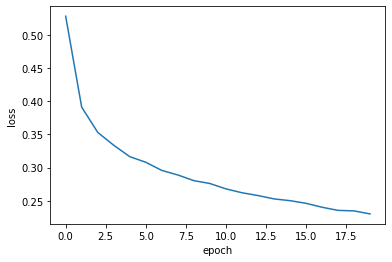

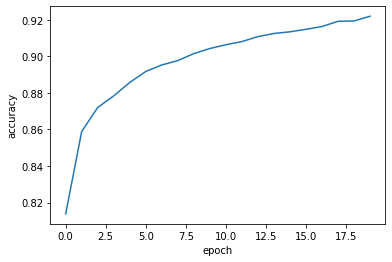

In [ ]:
# epoch마다 손실값을 그래프로 그렸다
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# epoch마다 정확도를 그래프로 그렸다
plt.plot(history.history["accuracy"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [ ]:
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


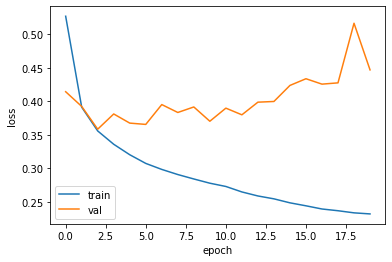

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()

옵티마이저변경(RMSprop(기본값) -> Adam)



In [ ]:
model = model_fn()
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


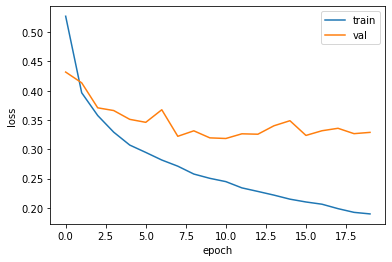

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()
# 옵티마이저를 변경하니까 검증세트의 에포크 진행에 따른 손실이 조금 줄어들었다

**DropOut**

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()
# dropout이라는 층이 생기지만 배열을 건들진 않지만 일부 뉴런의 출력을 0으로 만든다. 당연하지만 뉴런 훈련에서만 사용

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


**훈련된 모델의 저장**

model.save_weights("model-weights.h5")
+ 훈련된 모델의 파라미터를 저장하는 메서드
+ .h5 확장자는 HDF5포맷이다


model.save("model-whole.h5")
+ 모델 구조와 모델 파라미터를 함께 저장하는 메서드

실행 폴더에 저장된다. !ls -al *.h5

model.load_weights("model-weights.h5") 
+ 모델의 파라미터를 불러오는 메서드
+ 모델의 구조가 같은 경우에만 파라미터를 가져와서 사용하는 것이 가능하다


In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
# axis=-1 : 배열의 마지막 차원(여기서는 2차원)에 따라서 최댓값을 고른다
print(np.mean(val_labels == val_target))

0.07341666666666667


**Callback**

keras.callbacks 패키지아래에 있는 클래스들

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5")
model.fit(train_scaled, train_target, epochs=15, verbose=0, 
          validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb]) # 훈련 후 최상의 검증 점수를 낸 모델이 저장된다(best-model.h5).

In [ ]:
# 모델 불러와서 점수 확인하기
model = keras.models.load_model("best-model.h5")
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3262 - accuracy: 0.8833


[0.32624801993370056, 0.8833333253860474]

# 조기 종료

**early stopping**

> early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

명령으로 설정할 수 있다.
+ patience 의 값의 회수만큼 검증 점수가 향상되지 않으면 훈련을 중지한다
+ restore_best_weights=True 는 가장 낮은 검증 손실을 낸 모델을 파라미터로 되돌린다



In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")
checkpoint_cb = keras.callbacks.ModelCheckpoint("best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=15, verbose=0, 
          validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb]) # 훈련 후 최상의 검증 점수를 낸 모델이 저장된다(best-model.h5).

In [ ]:
# 중단된 epoch 확인
# print(early_stopping_cb.stopped_epoch)
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.8887


[0.31457576155662537, 0.8886666893959045]

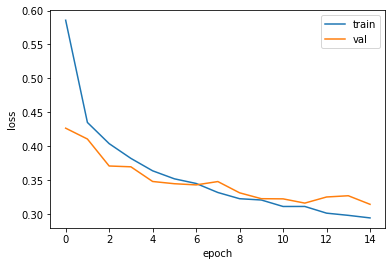

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["train", "val"])
plt.show()